### Convert to True Types

In [1]:
import pandas as pd
import numpy as np
import sklearn
import datetime
import time

In [2]:
df = pd.read_csv("/home/musasina/Desktop/projects/ZiraatBankFraudAI/datasets/customer_segmentation_data.csv")
df.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


In [3]:
df = df.drop("Customer ID",axis=1)
df = df.drop("Geographic Information",axis=1)

In [4]:
df["Age"] = df["Age"].apply(lambda x : int(x))

In [5]:
df["Gender"], equivalent = pd.factorize(df["Gender"],sort=True)
print(equivalent)

Index(['Female', 'Male'], dtype='object')


In [6]:
df["Marital Status"], equivalent = pd.factorize(df["Marital Status"],sort=True)
print(equivalent)

Index(['Divorced', 'Married', 'Separated', 'Single', 'Widowed'], dtype='object')


In [7]:
df["Education Level"], equivalent = pd.factorize(df["Education Level"],sort=True)
print(equivalent)

Index(['Associate Degree', 'Bachelor's Degree', 'Doctorate',
       'High School Diploma', 'Master's Degree'],
      dtype='object')


In [8]:
df["Occupation"], equivalent = pd.factorize(df["Occupation"],sort=True)
print(equivalent)

Index(['Artist', 'Doctor', 'Engineer', 'Entrepreneur', 'Lawyer', 'Manager',
       'Nurse', 'Salesperson', 'Teacher'],
      dtype='object')


In [9]:
df["Income Level"] = df["Income Level"].apply(lambda x : int(x))

In [10]:
df["Behavioral Data"], equivalent = pd.factorize(df["Behavioral Data"],sort=True)
print(equivalent)

Index(['policy1', 'policy2', 'policy3', 'policy4', 'policy5'], dtype='object')


In [14]:
def convert_time_to_posix(text:str):
    format_1 = "%d-%m-%Y"
    format_2 = "%m/%d/%Y"
    try:
        return datetime.datetime.timestamp(datetime.datetime.strptime(str(text),format_1))
    except BaseException:
        return datetime.datetime.timestamp(datetime.datetime.strptime(str(text),format_2))

In [15]:
df["Purchase History"] = df["Purchase History"].apply(convert_time_to_posix)
df["Purchase History"].head()

0    1.538600e+09
1    1.528664e+09
2    1.620248e+09
3    1.518124e+09
4    1.539032e+09
Name: Purchase History, dtype: float64

In [16]:
df["Interactions with Customer Service"], equivalent = pd.factorize(df["Interactions with Customer Service"],sort=True)
print(equivalent)

Index(['Chat', 'Email', 'In-Person', 'Mobile App', 'Phone'], dtype='object')


In [17]:
df["Insurance Products Owned"], equivalent = pd.factorize(df["Insurance Products Owned"],sort=True)
print(equivalent)

Index(['policy1', 'policy2', 'policy3', 'policy4', 'policy5'], dtype='object')


In [18]:
df["Coverage Amount"] = df["Coverage Amount"].apply(lambda x : int(x))
df["Premium Amount"] = df["Premium Amount"].apply(lambda x : int(x))

In [19]:
df["Policy Type"], equivalent = pd.factorize(df["Policy Type"],sort=True)
print(equivalent)

Index(['Business', 'Family', 'Group', 'Individual'], dtype='object')


In [20]:
df["Customer Preferences"], equivalent = pd.factorize(df["Customer Preferences"],sort=True)
print(equivalent)

Index(['Email', 'In-Person Meeting', 'Mail', 'Phone', 'Text'], dtype='object')


In [21]:
df["Preferred Communication Channel"], equivalent = pd.factorize(df["Preferred Communication Channel"],sort=True)
print(equivalent)

Index(['Email', 'In-Person Meeting', 'Mail', 'Phone', 'Text'], dtype='object')


In [22]:
df["Preferred Contact Time"], equivalent = pd.factorize(df["Preferred Contact Time"],sort=True)
print(equivalent)

Index(['Afternoon', 'Anytime', 'Evening', 'Morning', 'Weekends'], dtype='object')


In [23]:
df["Preferred Language"], equivalent = pd.factorize(df["Preferred Language"],sort=True)
print(equivalent)

Index(['English', 'French', 'German', 'Mandarin', 'Spanish'], dtype='object')


In [24]:
df["Segmentation Group"], equivalent = pd.factorize(df["Segmentation Group"],sort=True)
print(equivalent)

Index(['Segment1', 'Segment2', 'Segment3', 'Segment4', 'Segment5'], dtype='object')


### Select Futures

In [25]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

In [28]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [29]:
X.head()

,Age,Gender,Marital Status,Education Level,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language
0,23,0,1,0,3,70541,4,1.538600e+09,4,1,366603,2749,2,0,1,0,0
1,26,1,4,2,5,54168,4,1.528664e+09,0,0,780236,1966,2,2,1,3,1
2,29,0,3,0,3,73899,4,1.620248e+09,1,2,773926,4413,2,0,2,2,2
3,20,1,0,1,3,63381,4,1.518124e+09,0,1,787815,4342,1,4,1,1,1
4,25,0,2,1,5,38794,0,1.539032e+09,0,3,366506,1276,1,0,4,4,0


In [30]:
Y.head()

0    4
1    4
2    2
3    2
4    1
Name: Segmentation Group, dtype: int64

In [31]:
infos = mutual_info_classif(X,Y)

In [34]:
infos_dict = {}

for name,value in zip(X.columns,infos):
    infos_dict[str(name)] = value

In [43]:
import seaborn as sns

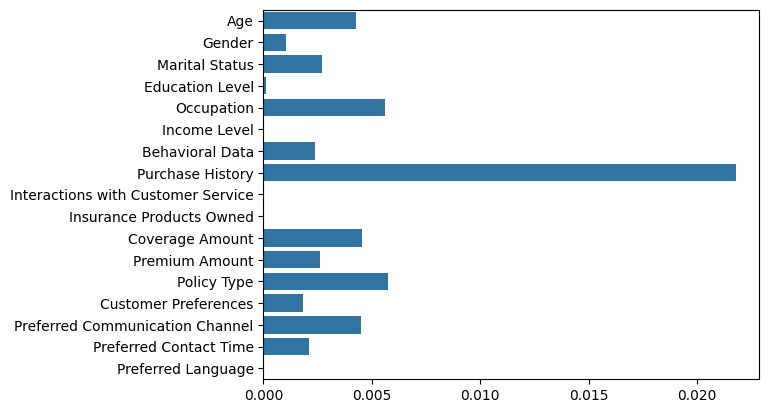

In [44]:
sns.barplot(x=list(infos_dict.values()),y= list(infos_dict.keys()))
plt.show()

In [45]:
X = X.drop("Education Level",axis=1)
X = X.drop("Income Level",axis=1)
X = X.drop("Interactions with Customer Service",axis=1)
X = X.drop("Insurance Products Owned",axis=1)
X = X.drop("Preferred Language",axis=1)

### Train

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

In [ ]:
gini_random_forest = RandomForestClassifier(criterion="gini",random_state=42)
entropy_random_forest = RandomForestClassifier(criterion="entropy",random_state=42)
log_random_forest = RandomForestClassifier(criterion="log_loss",random_state=42)

In [ ]:
gini_cros_val = cross_validate(gini_random_forest,X,Y)
entropy_cros_val = cross_validate(entropy_random_forest,X,Y)
log_cros_val = cross_validate(log_random_forest,X,Y)

In [ ]:
print(gini_cros_val)["test_score"]
print(entropy_cros_val)["test_score"]
print(log_cros_val)["test_score"]